# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [50]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude

from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [51]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [52]:
url = "http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID="
target_url = url + weather_api_key

# Create lists to hold the reponse data
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
count = 0


print("----------------------------")        
print("Beginning Data Retrieval ")
print("----------------------------")    
# Loop through the list of cities and request data each city found

for city in cities:
    weather_response = requests.get(target_url + "&q=" + city + "&units=Imperial")
    weather_json = weather_response.json()
    try:
        city_name.append(weather_json['city']['name'])
        cloudiness.append(weather_json['list'][0]['clouds']['all'])
        country.append(weather_json['city']['country'])
        date.append(weather_json['list'][0]['dt'])
        humidity.append(weather_json['list'][0]['main']['humidity'])
        lat.append(weather_json['city']['coord']['lat'])
        lng.append(weather_json['city']['coord']['lon'])
        max_temp.append(weather_json['list'][0]['main']['temp_max'])
        wind_speed.append(weather_json['list'][0]['wind']['speed'])
        count = count + 1
        print(f"Processing record {count} of Set 1 | {city}")
    except:
        print("City not found. Skipping...") 
        pass
    
print("----------------------------")        
print("Data Retrieval Complete")
print("----------------------------") 

----------------------------
Beginning Data Retrieval 
----------------------------
Processing record 1 of Set 1 | mataura
Processing record 2 of Set 1 | tautira
Processing record 3 of Set 1 | pevek
Processing record 4 of Set 1 | vryheid
Processing record 5 of Set 1 | ribeira grande
Processing record 6 of Set 1 | clovis
Processing record 7 of Set 1 | clyde river
Processing record 8 of Set 1 | korla
City not found. Skipping...
Processing record 9 of Set 1 | hobart
Processing record 10 of Set 1 | kapaa
Processing record 11 of Set 1 | rikitea
Processing record 12 of Set 1 | husavik
Processing record 13 of Set 1 | hermanus
Processing record 14 of Set 1 | port alfred
Processing record 15 of Set 1 | sao felix do xingu
Processing record 16 of Set 1 | nanortalik
Processing record 17 of Set 1 | chicama
Processing record 18 of Set 1 | broken hill
Processing record 19 of Set 1 | rincon
Processing record 20 of Set 1 | cidreira
Processing record 21 of Set 1 | vientiane
Processing record 22 of Set 1

Processing record 183 of Set 1 | hofn
Processing record 184 of Set 1 | tabou
Processing record 185 of Set 1 | anadyr
Processing record 186 of Set 1 | buala
Processing record 187 of Set 1 | marovoay
Processing record 188 of Set 1 | wodonga
Processing record 189 of Set 1 | tornio
City not found. Skipping...
City not found. Skipping...
Processing record 190 of Set 1 | kathmandu
Processing record 191 of Set 1 | san patricio
City not found. Skipping...
Processing record 192 of Set 1 | damaturu
Processing record 193 of Set 1 | westport
Processing record 194 of Set 1 | san cristobal
Processing record 195 of Set 1 | coihaique
Processing record 196 of Set 1 | tekeli
Processing record 197 of Set 1 | jian
Processing record 198 of Set 1 | lompoc
Processing record 199 of Set 1 | sitka
Processing record 200 of Set 1 | le portel
Processing record 201 of Set 1 | san quintin
Processing record 202 of Set 1 | talnakh
City not found. Skipping...
Processing record 203 of Set 1 | corowa
Processing record 20

Processing record 366 of Set 1 | ust-kuyga
Processing record 367 of Set 1 | teguldet
Processing record 368 of Set 1 | yambio
Processing record 369 of Set 1 | punta alta
Processing record 370 of Set 1 | biak
Processing record 371 of Set 1 | jieshi
City not found. Skipping...
Processing record 372 of Set 1 | bengkulu
Processing record 373 of Set 1 | ostrovnoy
Processing record 374 of Set 1 | freeport
Processing record 375 of Set 1 | angoram
Processing record 376 of Set 1 | grand gaube
Processing record 377 of Set 1 | manggar
Processing record 378 of Set 1 | manakara
Processing record 379 of Set 1 | shiyan
Processing record 380 of Set 1 | port-gentil
Processing record 381 of Set 1 | oeiras do para
Processing record 382 of Set 1 | sao geraldo do araguaia
Processing record 383 of Set 1 | bonthe
Processing record 384 of Set 1 | tairua
City not found. Skipping...
Processing record 385 of Set 1 | jiwani
Processing record 386 of Set 1 | dubuque
Processing record 387 of Set 1 | bubaque
Processin

Processing record 549 of Set 1 | pasighat
Processing record 550 of Set 1 | berezanka
Processing record 551 of Set 1 | cairns
Processing record 552 of Set 1 | oyama
Processing record 553 of Set 1 | moctezuma
Processing record 554 of Set 1 | cagliari
----------------------------
Data Retrieval Complete
----------------------------


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pimentel
Processing Record 2 of Set 1 | victoria
Processing Record 3 of Set 1 | padang
Processing Record 4 of Set 1 | hasaki
Processing Record 5 of Set 1 | kahului
Processing Record 6 of Set 1 | rocha
Processing Record 7 of Set 1 | pangai
Processing Record 8 of Set 1 | amderma
City not found. Skipping...
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | watsa
Processing Record 14 of Set 1 | rosetta
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | bengkulu
Processing Record 19 of Set 1 | ust-nera
Processing Record 20 of Set 1 | qaanaaq
Processing Record 21 of Set 1 | georgetown
Processing Record 22 of Set 1 | u

Processing Record 38 of Set 4 | tres picos
Processing Record 39 of Set 4 | saint-francois
Processing Record 40 of Set 4 | bubaque
Processing Record 41 of Set 4 | mackay
Processing Record 42 of Set 4 | kirakira
Processing Record 43 of Set 4 | banda aceh
Processing Record 44 of Set 4 | bang saphan
Processing Record 45 of Set 4 | chuy
Processing Record 46 of Set 4 | san juan
Processing Record 47 of Set 4 | waingapu
Processing Record 48 of Set 4 | santa isabel
Processing Record 49 of Set 4 | turukhansk
Processing Record 0 of Set 5 | saurimo
Processing Record 1 of Set 5 | ambon
Processing Record 2 of Set 5 | ambulu
Processing Record 3 of Set 5 | olafsvik
Processing Record 4 of Set 5 | ahipara
Processing Record 5 of Set 5 | talnakh
Processing Record 6 of Set 5 | beringovskiy
Processing Record 7 of Set 5 | sobolevo
Processing Record 8 of Set 5 | tateyama
Processing Record 9 of Set 5 | shambu
Processing Record 10 of Set 5 | dingle
Processing Record 11 of Set 5 | nizhneyansk
City not found. Ski

Processing Record 28 of Set 8 | mongomo
Processing Record 29 of Set 8 | hunza
City not found. Skipping...
Processing Record 30 of Set 8 | bow island
Processing Record 31 of Set 8 | moerai
Processing Record 32 of Set 8 | xichang
Processing Record 33 of Set 8 | sakhnovshchyna
Processing Record 34 of Set 8 | northam
Processing Record 35 of Set 8 | santa rosa
Processing Record 36 of Set 8 | severo-yeniseyskiy
Processing Record 37 of Set 8 | madera
Processing Record 38 of Set 8 | rizhao
Processing Record 39 of Set 8 | okhotsk
Processing Record 40 of Set 8 | bani
Processing Record 41 of Set 8 | awjilah
Processing Record 42 of Set 8 | miles city
Processing Record 43 of Set 8 | ulaanbaatar
Processing Record 44 of Set 8 | lagoa
Processing Record 45 of Set 8 | syasstroy
Processing Record 46 of Set 8 | honiara
Processing Record 47 of Set 8 | east london
Processing Record 48 of Set 8 | karakol
Processing Record 49 of Set 8 | yeletskiy
City not found. Skipping...
Processing Record 0 of Set 9 | andr

Processing Record 14 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 15 of Set 12 | adeje
Processing Record 16 of Set 12 | simpang
Processing Record 17 of Set 12 | athabasca
Processing Record 18 of Set 12 | prince rupert
Processing Record 19 of Set 12 | bilibino
Processing Record 20 of Set 12 | sayyan
Processing Record 21 of Set 12 | figline valdarno
Processing Record 22 of Set 12 | srednekolymsk
Processing Record 23 of Set 12 | kapit
Processing Record 24 of Set 12 | erenhot
Processing Record 25 of Set 12 | zachagansk
City not found. Skipping...
Processing Record 26 of Set 12 | toftir
City not found. Skipping...
Processing Record 27 of Set 12 | agdam
Processing Record 28 of Set 12 | indianola
Processing Record 29 of Set 12 | honiton
Processing Record 30 of Set 12 | batemans bay
Processing Record 31 of Set 12 | namtsy
Processing Record 32 of Set 12 | bonoua
Processing Record 33 of Set 12 | aracati
Processing Record 34 of Set 12 | mareeba
Processing Record 35 of Set 1

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [53]:
# Put response data into DataFrame

weather_dict = {"City": city_name,"Lat": lat, "Lng":lng,
                "Max Temp":max_temp,"Humidity":humidity,"Cloudiness":cloudiness,
                "Wind Speed":wind_speed,"Country":country, "Date":date}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,43.45,83,82,6.04,NZ,1595624400
1,Tautira,-17.7333,-149.1500,76.50,74,16,16.58,PF,1595624400
2,Pevek,69.7008,170.3133,45.59,71,89,7.61,RU,1595624400
3,Vryheid,-27.7695,30.7917,48.25,90,19,6.55,ZA,1595624400
4,Ribeira Grande,38.5167,-28.7000,72.00,67,10,7.56,PT,1595624400


In [54]:
# Export the city_data into a csv
weather_data.to_csv("output_data/cities.csv")

# Show Record Count
record_count = len(weather_data)
record_count

554

City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [55]:
# Display the city data statistics
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,5.540000e+02
mean,20.386767,21.592590,69.352852,69.514440,51.249097,7.622509,1.595624e+09
std,33.342215,89.925293,13.804691,18.508509,35.466706,5.151311,0.000000e+00
min,-54.800000,-179.166700,33.120000,7.000000,0.000000,0.430000,1.595624e+09
25%,-5.842325,-52.631875,58.715000,59.250000,15.250000,3.600000,1.595624e+09
50%,24.650000,23.190500,71.620000,73.000000,55.000000,6.510000,1.595624e+09
75%,47.716625,103.149600,79.640000,83.000000,87.000000,10.395000,1.595624e+09
max,78.218600,179.316700,109.530000,100.000000,100.000000,28.190000,1.595624e+09


In [6]:
# Based on the description of the data, above, there are NO cities with Humidity greater than 100%

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [7]:
#  Get the indices of cities that have humidity over 100%.

# Based on the description of the data, above, there are NO cities with Humidity greater than 100%

Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

# NEW DATAFRAME IS NOT NECESSARY SINCE NO CITIES HAVE HUMIDITY GREATER THAN 100%


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


In [9]:
# Extract relevant fields from the data frame

# NEW DATAFRAME IS NOT NECESSARY SINCE NO CITIES HAVE HUMIDITY GREATER THAN 100%

# Export the City_Data into a csv

# NEW CSV FILE IS NOT NECESSARY SINCE NO CITIES HAVE HUMIDITY GREATER THAN 100%


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

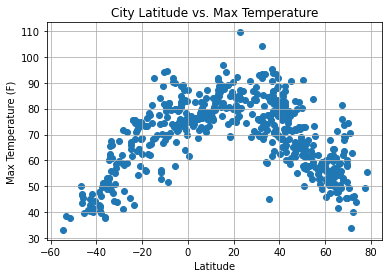

In [56]:
# Create a scatter plot for latitude vs. temperature
# Format and show plot

scatter_lat = weather_data["Lat"]
scatter_temp = weather_data["Max Temp"]

plt.scatter(scatter_lat,scatter_temp)
plt.grid()
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("scatter_plot_latitude_vs_maxtemp")
plt.show()


In [ ]:
# The, above, plot is showing the relationship between the latitude on the earth vs the maximum temperature experienced at that location on the earth.
# Notice how the maximum temperature is similar at the north and south poles and the highest temperatures are 20 degrees above the equator.

## Latitude vs. Temperature Plot

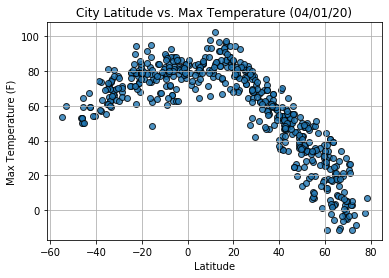

## Latitude vs. Humidity Plot

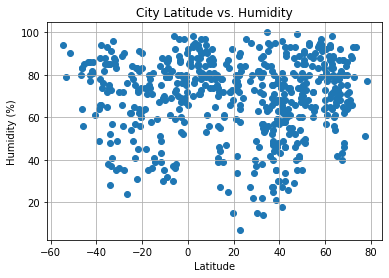

In [57]:
# Create a scatter plot for latitude vs. humidity
# Format and show plot

scatter_lat = weather_data["Lat"]
scatter_hum = weather_data["Humidity"]

plt.scatter(scatter_lat,scatter_hum)
plt.grid()
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("scatter_plot_latitude_vs_humidity")
plt.show()

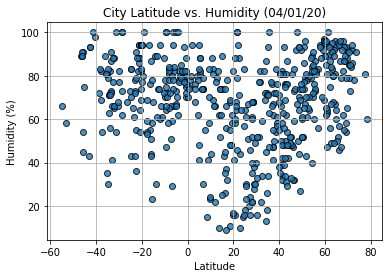

In [11]:
# The, above, plot is showing the relationship between the latitude on the earth vs the humidity experienced at that location on the earth.
# No real discernable pattern of the earth's humidity relative to latitude.

## Latitude vs. Cloudiness Plot

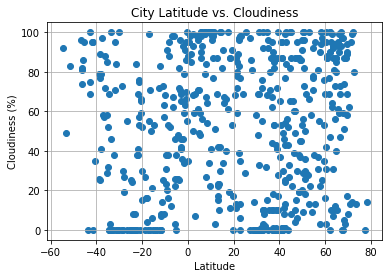

In [58]:
# Create a scatter plot for latitude vs. cloudiness
# Format and show plot

scatter_lat = weather_data["Lat"]
scatter_cloud = weather_data["Cloudiness"]

plt.scatter(scatter_lat,scatter_cloud)
plt.grid()
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("scatter_plot_latitude_vs_cloudiness")
plt.show()

In [ ]:
# The, above, plot is showing the relationship between the latitude on the earth vs the cloudiness experienced at that location on the earth.
# No real discernable pattern of the earth's cloudiness to latitude.

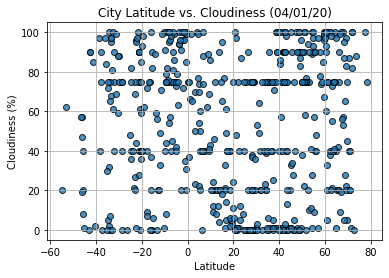

## Latitude vs. Wind Speed Plot

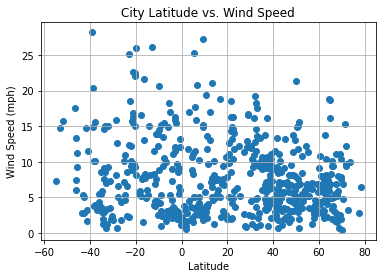

In [59]:
# Create a scatter plot for latitude vs. wind speed
# Format and show plot

scatter_lat = weather_data["Lat"]
scatter_wind = weather_data["Wind Speed"]

plt.scatter(scatter_lat,scatter_wind)
plt.grid()
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("scatter_plot_latitude_vs_windspeed")
plt.show()

In [ ]:
# The, above, plot is showing the relationship between the latitude on the earth vs the wind speed experienced at that location on the earth.
# Looks like the majority of the earch experiences wind speeds up to 20 mph over the range of latitudes.

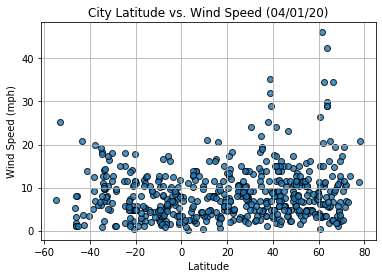

## Linear Regression

In [47]:
# OPTIONAL: Create a function to create Linear Regression plots

In [60]:
# Create Northern and Southern Hemisphere DataFrames
northern_lat_df = weather_data.loc[weather_data["Lat"] >= 0,:]
southern_lat_df = weather_data.loc[weather_data["Lat"] < 0,:]

northern_lat_df.head()
# Northern latitudes dataframe

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Pevek,69.7008,170.3133,45.59,71,89,7.61,RU,1595624400
4,Ribeira Grande,38.5167,-28.7000,72.00,67,10,7.56,PT,1595624400
5,Clovis,36.8252,-119.7029,95.27,27,10,3.27,US,1595624400
6,Clyde River,70.4692,-68.5914,49.35,72,62,4.79,CA,1595624400
7,Korla,41.7597,86.1469,81.09,49,0,9.26,CN,1595624400


In [61]:
southern_lat_df.head()
# Southern latitudes dataframe

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,43.45,83,82,6.04,NZ,1595624400
1,Tautira,-17.7333,-149.1500,76.50,74,16,16.58,PF,1595624400
3,Vryheid,-27.7695,30.7917,48.25,90,19,6.55,ZA,1595624400
8,Hobart,-42.8794,147.3294,42.87,77,69,5.30,AU,1595624400
10,Rikitea,-23.1203,-134.9692,68.45,57,8,12.33,PF,1595624400


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.6789513739710754


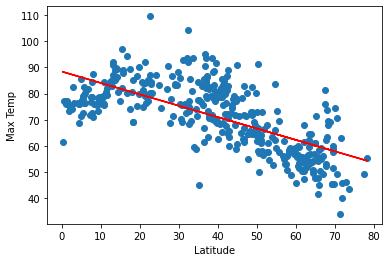

<Figure size 432x288 with 0 Axes>

In [62]:
x_values = northern_lat_df["Lat"]
y_values = northern_lat_df["Max Temp"]
plot_linear_regression(x_values,y_values,"Max Temp",(6,30))

plt.savefig('northern_max_temp')

The r-squared is: 0.8271188905041935


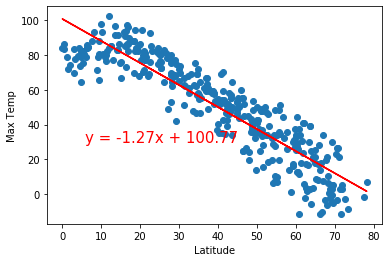

In [16]:
# The earth's max temperature decreases (negative correlation) with the latitude as we move away from the equator.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8198269906883925


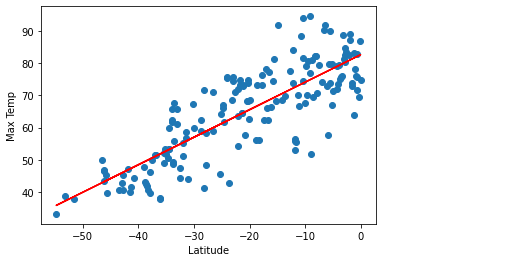

<Figure size 432x288 with 0 Axes>

In [63]:
x_values = southern_lat_df["Lat"]
y_values = southern_lat_df["Max Temp"]
plot_linear_regression(x_values,y_values,"Max Temp",(6,30))

plt.savefig("southern_max_temp")

The r-squared is: 0.39936284758885965


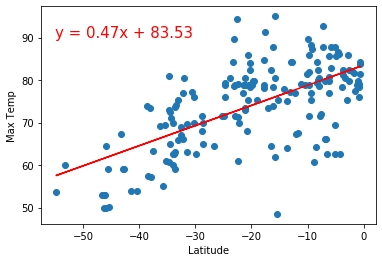

In [17]:
# The earth's max temperature increases (shows a positive correlation) with the latitude as we move closer to the equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.008120078892409899


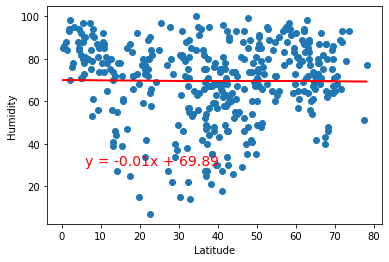

<Figure size 432x288 with 0 Axes>

In [64]:
x_values = northern_lat_df["Lat"]
y_values = northern_lat_df["Humidity"]
plot_linear_regression(x_values,y_values,"Humidity",(6,30))

plt.savefig("northern_humidity")

The r-squared is: 0.10829462153873139


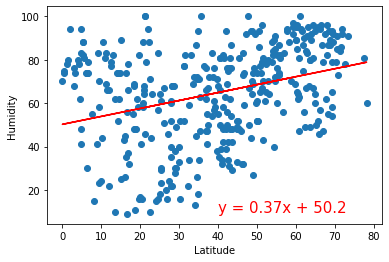

In [18]:
# There is no correlation between the earth's latitude and humidity in the northern hemishere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.07501341931700059


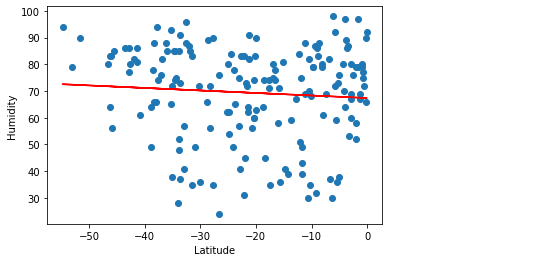

<Figure size 432x288 with 0 Axes>

In [65]:
x_values = southern_lat_df["Lat"]
y_values = southern_lat_df["Humidity"]
plot_linear_regression(x_values,y_values,"Humidity",(6,30))

plt.savefig("southern_humidity")

The r-squared is: 0.0008996079328825663


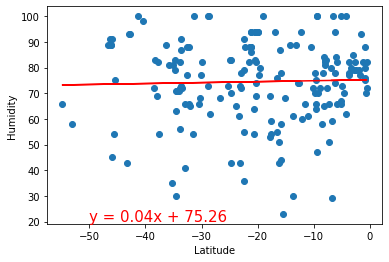

In [19]:
# There is no correlation between the earth's latitude and humidity in the southern hemishere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.06683175996137627


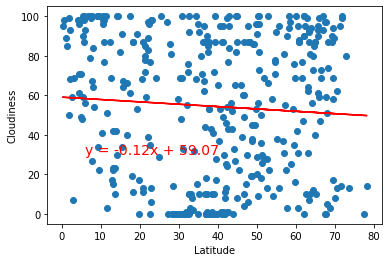

<Figure size 432x288 with 0 Axes>

In [66]:
x_values = northern_lat_df["Lat"]
y_values = northern_lat_df["Cloudiness"]
plot_linear_regression(x_values,y_values,"Cloudiness",(6,30))

plt.savefig("northern_cloudiness")

The r-squared is: 0.05768812657005063


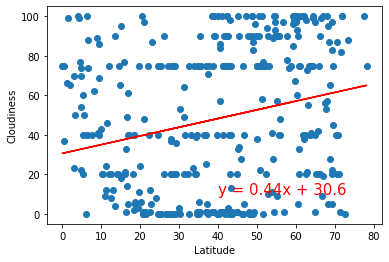

In [20]:
# There is no correlation between the earth's latitude and cloudiness in the northern hemishere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.026842202350677333


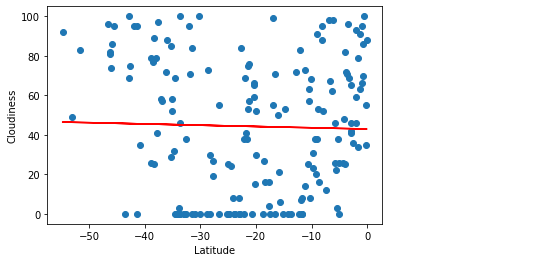

<Figure size 432x288 with 0 Axes>

In [67]:
x_values = southern_lat_df["Lat"]
y_values = southern_lat_df["Cloudiness"]
plot_linear_regression(x_values,y_values,"Cloudiness",(6,30))

plt.savefig("southern_cloudiness")

The r-squared is: 0.0684912094859049


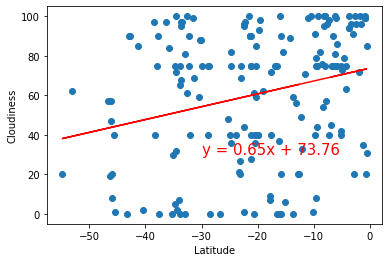

In [21]:
# There is no correlation between the earth's latitude and cloudiness in the southern hemishere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.14232281493711868


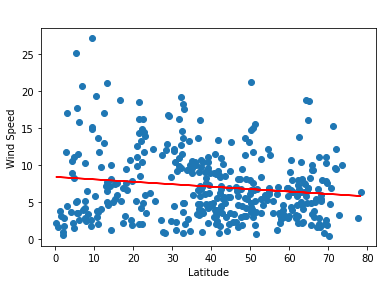

<Figure size 432x288 with 0 Axes>

In [68]:
x_values = northern_lat_df["Lat"]
y_values = northern_lat_df["Wind Speed"]
plot_linear_regression(x_values,y_values,"Wind Speed",(6,30))

plt.savefig("northern_wind_speed")

The r-squared is: 0.023371104533850804


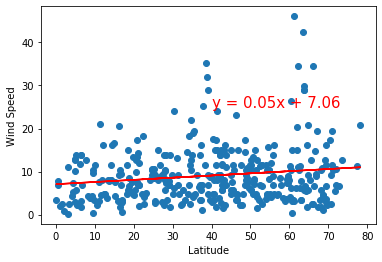

In [22]:
# There is no correlation between the earth's latitude and wind speed in the northern hemishere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.032386220663596775


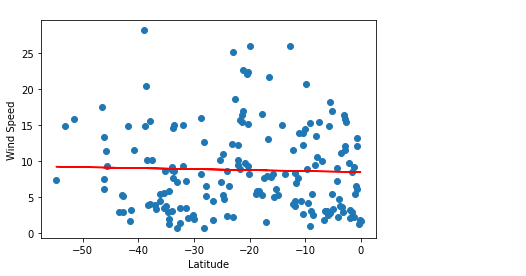

<Figure size 432x288 with 0 Axes>

In [69]:
x_values = southern_lat_df["Lat"]
y_values = southern_lat_df["Wind Speed"]
plot_linear_regression(x_values,y_values,"Wind Speed",(6,30))

plt.savefig("southern_wind_speed")

The r-squared is: 0.03381889207758188


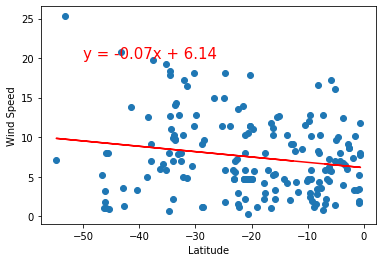

In [23]:
# There does not look to be much of a correlation between the earth's latitude and wind speed in the southern hemishere.